Shivam Goel

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/swapnilbhange/Give-Life_-Predict-Blood-Donations/master/Dataset/transfusion.data"

In [3]:
transfusion = pd.read_csv("Dataset/transfusion.data")
transfusion

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [4]:
transfusion.shape

(748, 5)

In [5]:
transfusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [6]:
transfusion.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [7]:
transfusion.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [8]:
# Rename target column as 'target' for brevity 
transfusion.rename(
    columns={'whether he/she donated blood in March 2007': 'Target'},
    inplace=True
)

# Print out the first 2 rows
transfusion.head(2)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Target
0,2,50,12500,98,1
1,0,13,3250,28,1


In [9]:
from sklearn.model_selection import train_test_split

In [10]:

# Import train_test_split method
from sklearn.model_selection import train_test_split

# Split transfusion DataFrame into
# X_train, X_test, y_train and y_test datasets,
# stratifying on the `target` column
X_train, X_test, y_train, y_test = train_test_split(
    transfusion.drop(columns='Target'),
    transfusion.Target,
    test_size=0.25,
    random_state=42, stratify= transfusion.Target
)

# Print out the first 2 rows of X_train
X_train.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
334,16,2,500,16
99,5,7,1750,26
116,2,7,1750,46
661,16,2,500,16
154,2,1,250,2


In [11]:
seed = 7
scoring = 'accuracy'

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [13]:
# Spot Check Algorithms
models = []
#models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\DELLL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\DELLL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LDA: 0.771898 (0.029072)
KNN: 0.745081 (0.027837)


C:\Users\DELLL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\DELLL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\DELLL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


CART: 0.689756 (0.065301)
NB: 0.755890 (0.049940)
SVM: 0.757675 (0.040897)


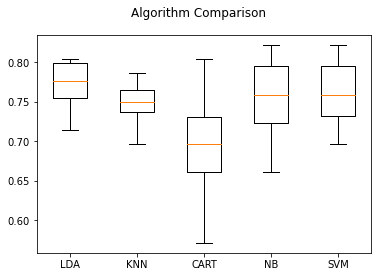

In [15]:
# Compare Algorithms
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [16]:
# Make predictions on validation dataset
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)
predictions = cart.predict(X_train)
print(accuracy_score(y_train, predictions))
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))

0.9411764705882353
[[427   0]
 [ 33 101]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       427
           1       1.00      0.75      0.86       134

    accuracy                           0.94       561
   macro avg       0.96      0.88      0.91       561
weighted avg       0.95      0.94      0.94       561



In [17]:
# Finalize model
import pickle
cart_model = DecisionTreeClassifier()
cart_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
# Save model to disk
filename = 'Final_Model.sav'
pickle.dump(cart_model, open(filename, 'wb'))

In [19]:
cd

C:\Users\DELLL


In [20]:
# Save model to disk
import pickle
pickle.dump(cart_model,open('cart_model.pkl','wb'))

In [21]:
cd

C:\Users\DELLL
